# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [443]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 -q --user


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [444]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## import library to suppress the warnings.
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [445]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [446]:
# To read the data
df = pd.read_csv('foodhub_order.csv')

In [447]:
# Read the first 5 rows from the data.
default_number_of_rows_to_view = 5
df.head(default_number_of_rows_to_view)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [448]:
# To view the number of rows and columns in data.
df.shape

(1898, 9)

#### Observations:
Answer 1: Total 1898 rows and 9 columns are present in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [449]:
# To check the data types of different columns in data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Answer 2: The columns in the dataset consist of the following data types: int64, float64, and object. Also, all the rows are filled since nun-null count matches with the number of total rows in data i.e.1898.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# To check if are there any missing values (i.e. null or na )in data.
print('Check if there are any null values in data :')
print(df.isnull().sum())
print('\nCheck if there are any na values in data :')
print(df.isna().sum())


# count the number of uniq Restaurent.
print(f"\nNumber of unique Restauant in the data : ",df['restaurant_name'].nunique())

# To check the unique values in the day_of_the_week.
unique_day_of_the_week =df.groupby('day_of_the_week')['day_of_the_week'].unique()
print(f"\nUnique Day of the Week : {', '.join(map(str, unique_day_of_the_week))}")

# To check the unique rating in dataset.
print(f"\nUnique Rating : ",{', '.join(map(str, df['rating'].unique()))})     

# Count the values with rating 'Not given' and other
print(f"\nCount of other rating (represented False) and 'Not given' (represented True) as below : ", (df['rating'] == 'Not given').value_counts())

#Code to Checking Rating unique values
print(f"\nTotal count of 'Not given' rating in dataset : ",(df['rating'] == 'Not given').sum())

Check if there are any null values in data :
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Check if there are any na values in data :
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Number of unique Restauant in the data :  178

Unique Day of the Week : ['Weekday'], ['Weekend']

Unique Rating :  {'Not given, 5, 3, 4'}

Count of other rating (represented False) and 'Not given' (represented True) as below :  rating
False    1162
True      736
Name: count, dtype: int64

Total count of 'Not given' ratings in dataset :  736


#### Observations:
Answer 3:  There are 736 no of 'Not gievn' values for rating. which is accounting for approximately 38.77% of the total records.
 - As 'rating' is important column, and also 'Not given' Value is more than 1/3rd of dataset, imputation is required. - which will mark 'Not given' rating as 0 and other values as is of given rating for further processing).

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [451]:
# Check the statistic of data.

#get minimum food preparation time.
min_food_preparation_time =  df['food_preparation_time'].min()
print(f"Minimum food preparation time: {min_food_preparation_time} minutes")

#get average food preparation time.
average_food_preparation_time =  df['food_preparation_time'].mean()
print(f"Average food preparation time: {average_food_preparation_time:.2f} minutes")

#get maximum food preparation time.
max_food_preparation_time =  df['food_preparation_time'].max()
print(f"Max food preparation time: {max_food_preparation_time} minutes")

Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Max food preparation time: 35 minutes


#### Observations:
Statistical Summary, minimum, average and maximum time taken for food preparation once the order is placed.
- Minimum food preparation time: 20 minutes
- Average food preparation time: 27.371970495258168 minutes
- Max food preparation time: 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [452]:
# Write the code here
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
There were 736 orders with "Not given" or missing rating Not given.

 All orders in the dataset now have a rating in number as follow.
- Total 736 order given a rating of 'Not given'
- Total 588 order given a rating of 5
- Total 386 order given a rating of 4
- Total 188 order given a rating of 3


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Univariate analysis of Numerical variables :
- To generate histograms and box plots for all relevant numerical columns in the DataFrame to visualize their distributions, identify central tendencies, spread, and potential outliers, with appropriate titles and labels on the plot.

In [453]:

#a function to drow Histogram and BoxPlot for the given list of numerical variables.
def drow_univariate_numerical_plot(numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(15, 6))

        # Histogram subplot
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Histogram of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Frequency')

        # Box plot subplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=col)
        plt.title(f'Box Plot of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())

        plt.tight_layout() # to fit plot on the layout
        plt.show()


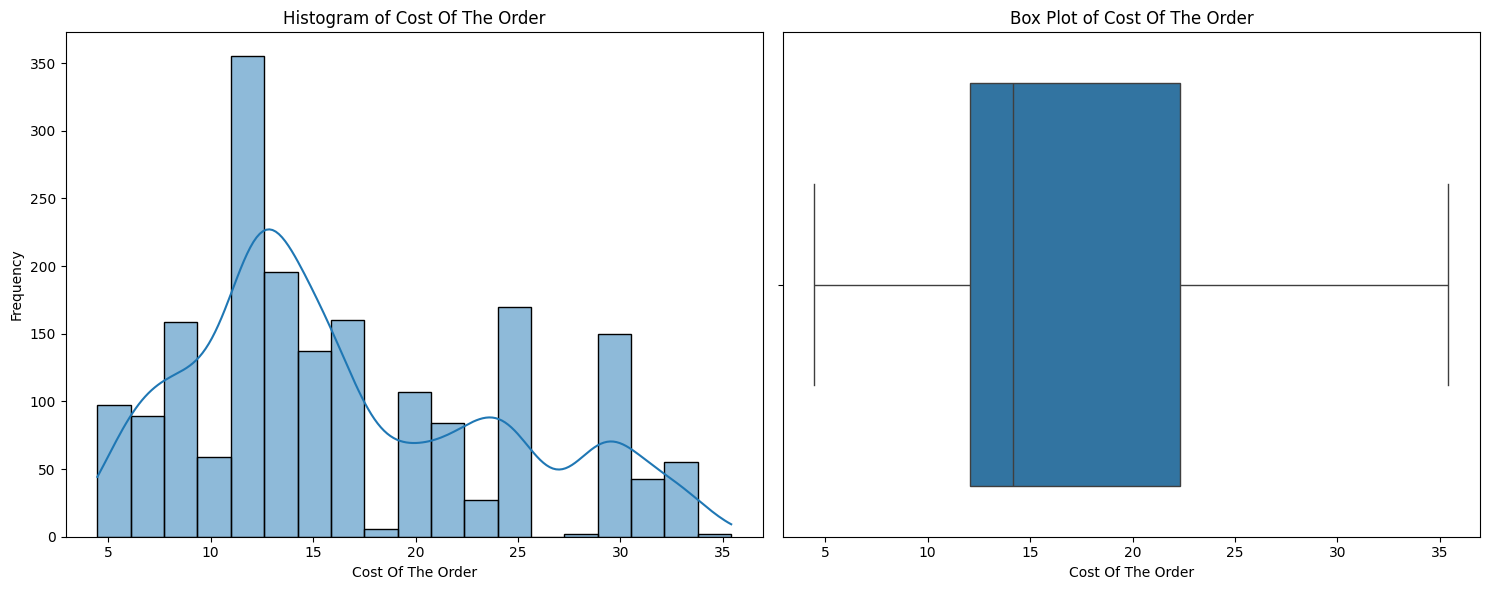

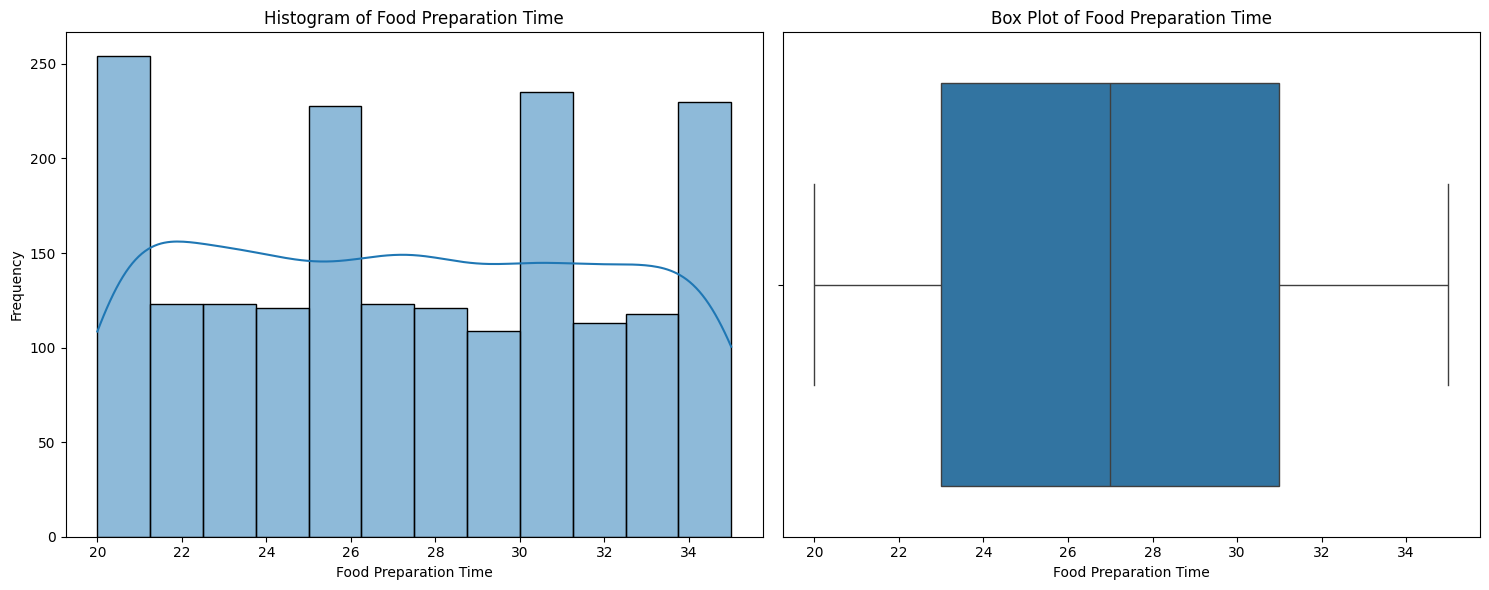

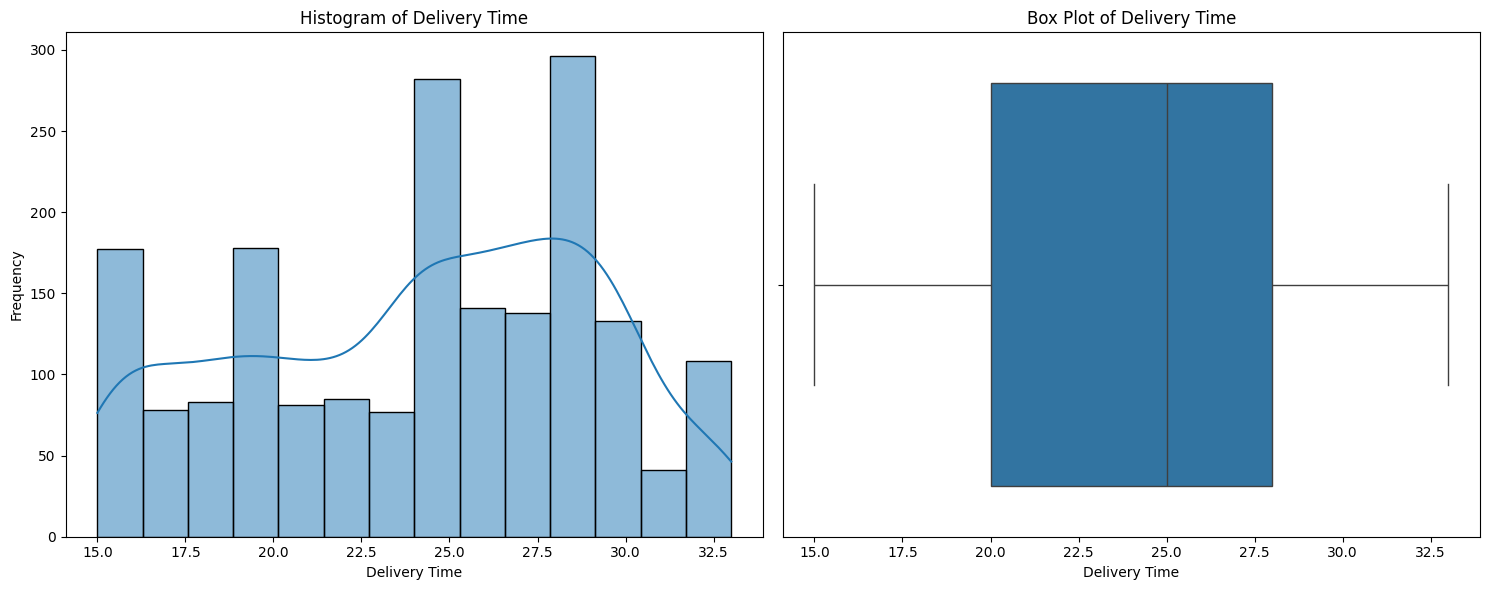

In [454]:
#To Plot Histogram and Boxplot sideby side to analyse the distribution of data.

#List all the required numerical columns for analysis.
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

#function to plot the Histogram and Boxplot for given list of numerical columns.
drow_univariate_numerical_plot(numerical_cols)

### Univariate Exploration of Categorical Variables:
To generate count plots for all relevant categorical columns in the DataFrame to visualize their distributions, identify the frequency of each category, and observe any dominant categories.  with appropriate titles and labels on the plot.

In [455]:
#a function to drow Countplot for the given list of Catogerical variables.
def drow_univariate_categorical_plot(categorical_cols):
    for col in categorical_cols:
        # Adjust figure size for 'restaurant_name' due to many categories
        if col == 'restaurant_name':
            plt.figure(figsize=(12, 28))
            sns.countplot(data=df, y=col, order=df[col].value_counts().index);
            plt.title(f'Count Plot of {col.replace("_", " ").title()}')
            plt.xlabel('Count')
            plt.ylabel(col.replace("_", " ").title())
        else:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=col, order=df[col].value_counts().index);
            plt.title(f'Count Plot of {col.replace("_", " ").title()}')
            plt.xlabel(col.replace("_", " ").title())
            plt.xticks(rotation=90)
            plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

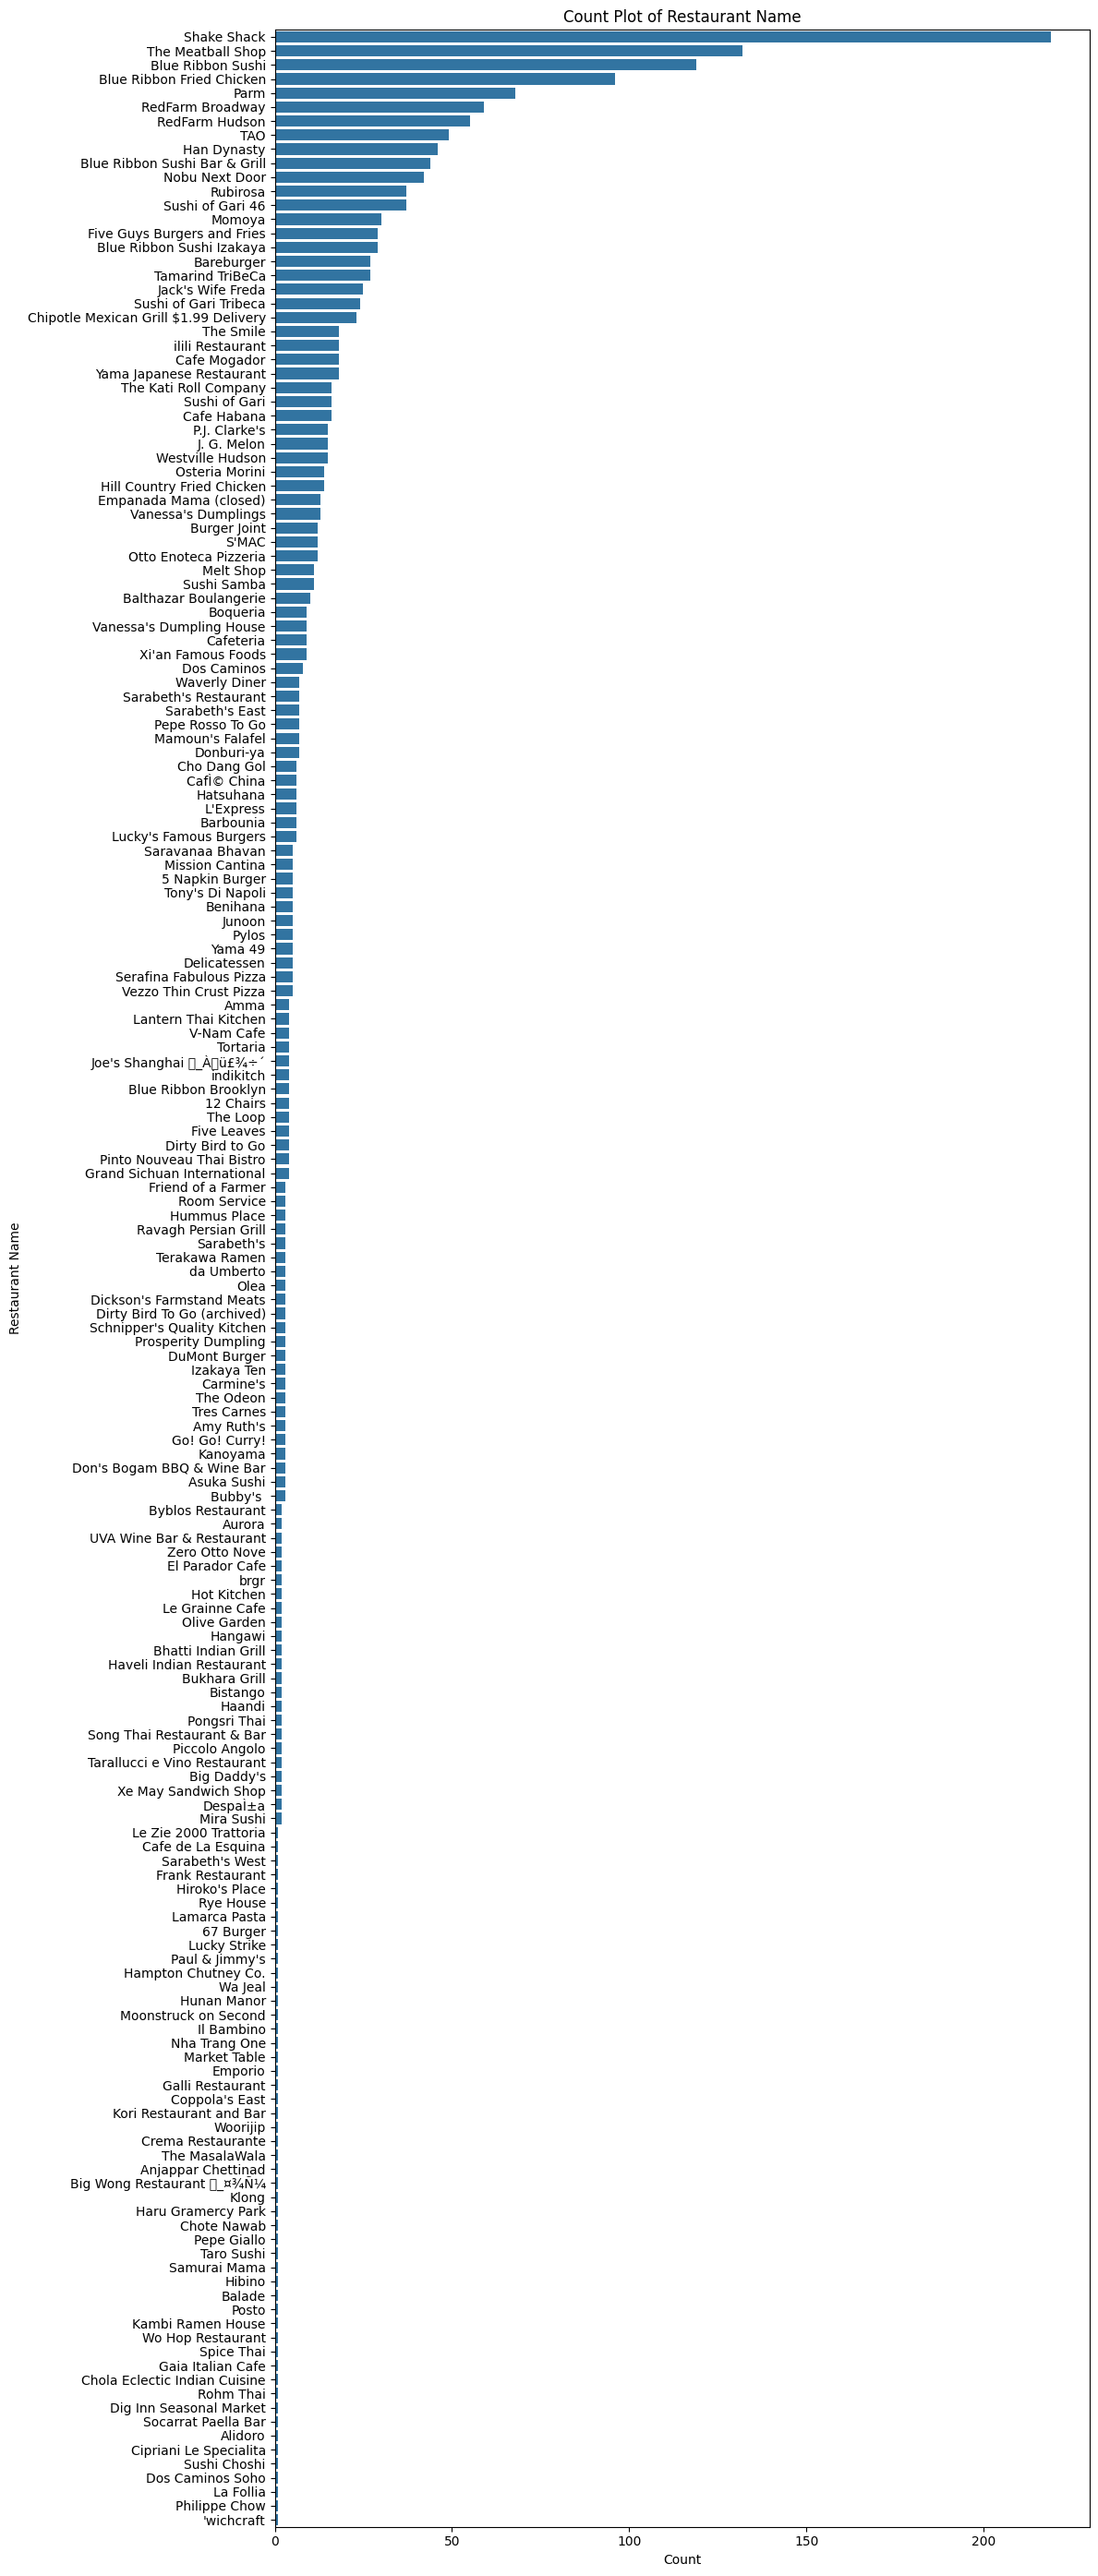

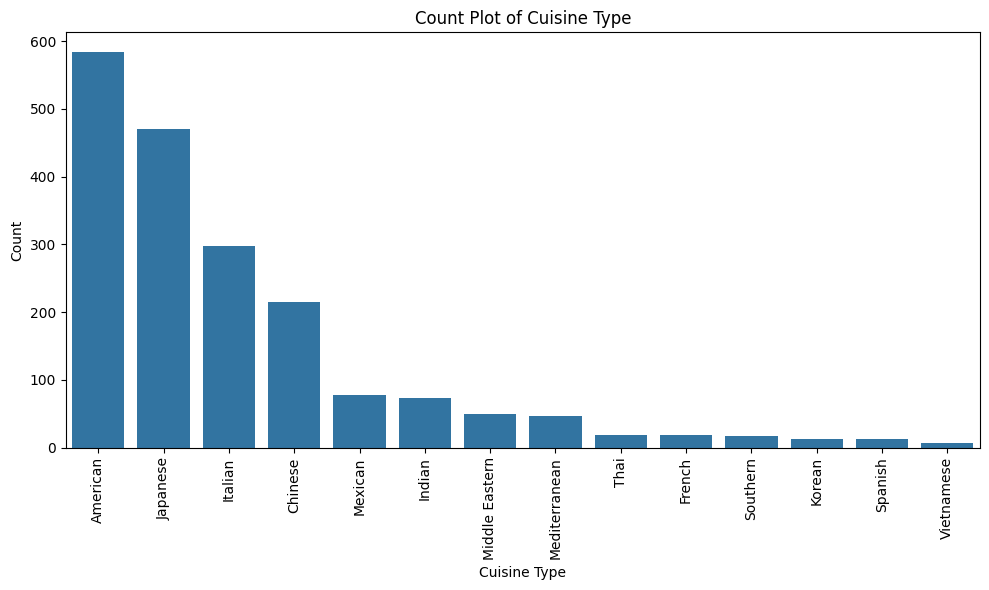

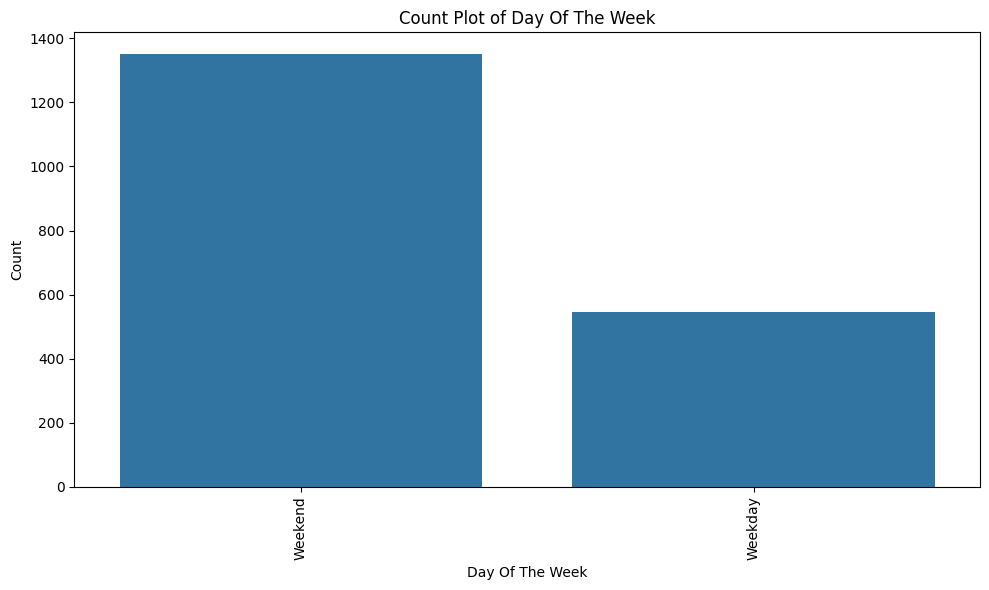

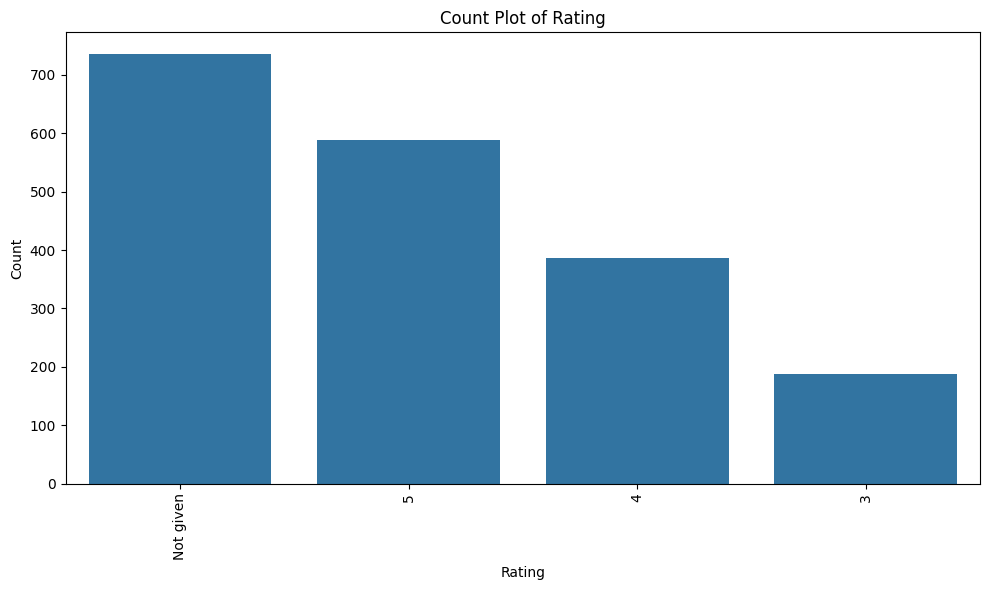

In [456]:
#To drow count Plot for the given list of categories.
categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

drow_univariate_categorical_plot(categorical_cols)

## Observation
### Insights from Numerical Variables:['cost_of_the_order', 'food_preparation_time', 'delivery_time']

<u>**1. Cost of the Order**</u>

* Distribution:  The histogram shows that the cost of orders is right-skewed.Most orders fall between approximately 10 and 25 units, with a distinct peak around 12–15 units.
* Central Tendency: The box plot indicates a median cost of around 15 units.The Interquartile Range (IQR) suggests that 50% of the orders are priced between roughly 12 and 20 units.
* Spread and Outliers: The box plot reveals several outliers on the higher end, indicating a subset of significantly more expensive orders.

<u>**2. Food Preparation Time**</u>

* Distribution:  The histogram suggests a relatively uniform distribution.Times range from 20 to 35 minutes without a strong peak, implying preparation times are fairly evenly spread across this range.
* Central Tendency: The median food preparation time is approximately 27–28 minutes.
* Spread and Outliers: The box plot shows a narrow spread, with the majority of preparation times concentrated between 25 and 30 minutes.There are very few outliers, and none are extreme.

<u>**3. Delivery Time**</u>
* Distribution: Similar to the cost of the order, delivery times show a left-skewed distribution.Most deliveries are completed between 20 and 30 minutes, with a noticeable peak around 25 minutes.
* Central Tendency: The median delivery time is approximately 26–27 minutes.
* Spread and Outliers: The box plot confirms the left skew, indicating that some deliveries take significantly longer than the typical timeframe.

### Insights from Categorical Variables: ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

<u>Restaurant Name:</u>
* Distribution: There is a wide variety of restaurants, with many having only a few orders. The most popular restaurants have a significantly higher number of orders compared to the rest, indicating a skewed distribution towards a few dominant establishments.
* Dominant Categories: 'Shake Shack', 'The Meatball Shop', and 'Blue Ribbon Sushi Izakaya' appear to be among the most frequently ordered restaurants.

<u>Cuisine Type:</u>
* Distribution: American cuisine is by far the most popular, followed by Japanese and Italian. Other cuisine types have much lower counts, indicating a preference for certain types of food among customers.
* Dominant Categories: American cuisine dominates the order counts.

<u>Day of the Week:</u>
* Distribution: Orders are significantly higher on the weekends.
* Dominant Categories: Weekends are the busiest days for food orders.

<u>Rating:</u> 
* Distribution: A large portion of orders are from restaurants with 0 (Not given) ratings. A notable number of orders are also from restaurants with 'Not given' ratings, which could imply either new restaurants or customers not explicitly providing a rating. Very few orders come from restaurants with '3' ratings, and no orders were placed for restaurants with ratings lower than 3.
* Dominant Categories: Restaurants with Not given (0) , 5 and 4 stars receive the most orders, with 'Not given' (0 rating) also being a large category.

<u>Data Analysis Key Findings</u>
* **Cost of the Order:** The distribution is right-skewed, with most orders costing between $10 and $25. The median cost is around $15, and there are several outliers indicating significantly more expensive orders.

* **Food Preparation Time:** This variable shows a relatively uniform distribution, with most times falling between 20 and 35 minutes. The median preparation time is approximately 27-28 minutes, and there are very few outliers.

* **Delivery Time:** The distribution is right-skewed, with most deliveries completed between 20 and 30 minutes, peaking around 25 minutes. The median delivery time is about 26-27 minutes, and there are several outliers representing longer delivery times.

* **Restaurant Name:** The data shows a wide variety of restaurants, with a few dominant ones receiving a significantly higher number of orders, such as 'Shake Shack', 'The Meatball Shop', and 'Blue Ribbon Sushi Izakaya'.

* **Cuisine Type:** American cuisine is the most popular, followed by Japanese and Italian, indicating a strong preference for these types among customers.

* **Day of the Week:** Order volumes are significantly higher on weekends that is Saturday and Sunday being the busiest days. 

* **Rating:** The majority of orders come from restaurants with 5 or 4-star ratings. A large number of orders also fall under the 'Not given' (0 rating) category. Very few orders are from 3-star restaurants, and none are below 3 stars.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [457]:
# To get the top 5 restaurants in terms of oreder received.
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
* There are total 178 unique restaurants in the dataset.
* "Shake Shack" had the highest order volume with 219 orders.
* The top 5 restaurants by order volume are: "Shake Shack" (219 orders), "The Meatball Shop" (180 orders), "Blue Ribbon Sushi" (168 orders), "Blue Ribbon Fried Chicken" (167 orders), and "Parm" (154 orders).



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [458]:
# To get the recordsethaving day of the week equal to weekend.
df_weekend = df[df['day_of_the_week'] == 'Weekend']

#To get Top values for the cuisine type on weekend
df_weekend['cuisine_type'].value_counts().head() 

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

#### Observations:
The most popular cuisine on weekend is: "American" (415 orders).


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [459]:
# Filter orders where cost_of_the_order is greater than 20
orders_gt_20 = df[df['cost_of_the_order'] > 20]

# Count the number of such orders
count_gt_20 = len(orders_gt_20)

# Get the total number of orders
total_orders = len(df)

# Calculate the percentage
percentage_gt_20 = (count_gt_20 / total_orders) * 100

print(f"The percentage of orders costing more than 20 dollars is: {percentage_gt_20:.2f}%")

The percentage of orders costing more than 20 dollars is: 29.24%


#### Observations:
The percentage of orders costing more than 20 dollars is: 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [460]:
# Calculate the mean delivery time and print
print(f"The mean order delivery time is: {df['delivery_time'].mean():.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:
The mean order delivery time is: 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [461]:
# Count the number of orders for each customer_id
customer_order_counts = df['customer_id'].value_counts()

# Get the top 3 most frequent customers
top_3_customers = customer_order_counts.head(3)

print("Top 3 most frequent customers and their order counts:")
display(top_3_customers)

Top 3 most frequent customers and their order counts:


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
Top 3 most frequent customers and their order counts:
* customer_id.  
* 52832 (order count=13 )          
* 47440 (order count=10)
* 83287 (order count=9)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Identify Important Variables
Explicitly identify the numerical and categorical variables from the `df` DataFrame that will be used for multivariate analysis, based on the previous univariate exploration.


In [462]:
numerical_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
categorical_vars = ['cuisine_type', 'day_of_the_week', 'rating']

print(f"Important Numerical variables for multivariate analysis: {numerical_vars}")
print(f"Important Categorical variables for multivariate analysis: {categorical_vars}")

Important Numerical variables for multivariate analysis: ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
Important Categorical variables for multivariate analysis: ['cuisine_type', 'day_of_the_week', 'rating']


### Analyze Numerical-Numerical Relationships
Calculate and visualize the correlation matrix of numerical variables using a heatmap to identify linear relationships. Additionally, generate a pair plot to observe pairwise distributions and potential non-linear relationships.


In [463]:

# 1. Calculate the  correlation matrix
correlation_matrix = df[numerical_vars].corr()
print("Correlation Matrix of Numerical Variables:")
print(correlation_matrix)


Correlation Matrix of Numerical Variables:
                       cost_of_the_order  food_preparation_time  delivery_time
cost_of_the_order               1.000000               0.041527      -0.029949
food_preparation_time           0.041527               1.000000       0.011094
delivery_time                  -0.029949               0.011094       1.000000


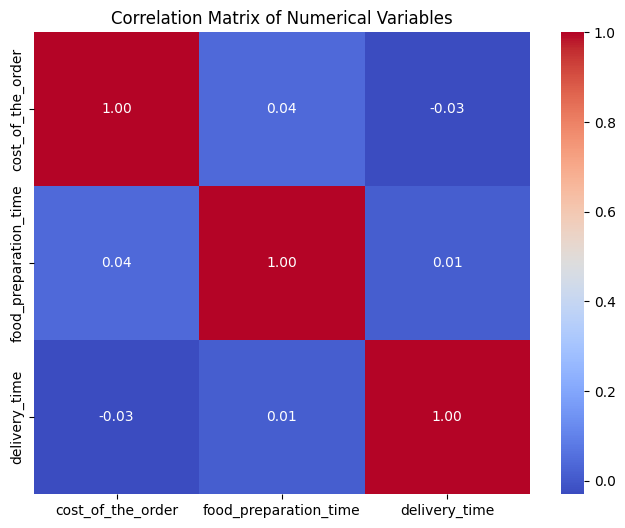

In [464]:
# 2. Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



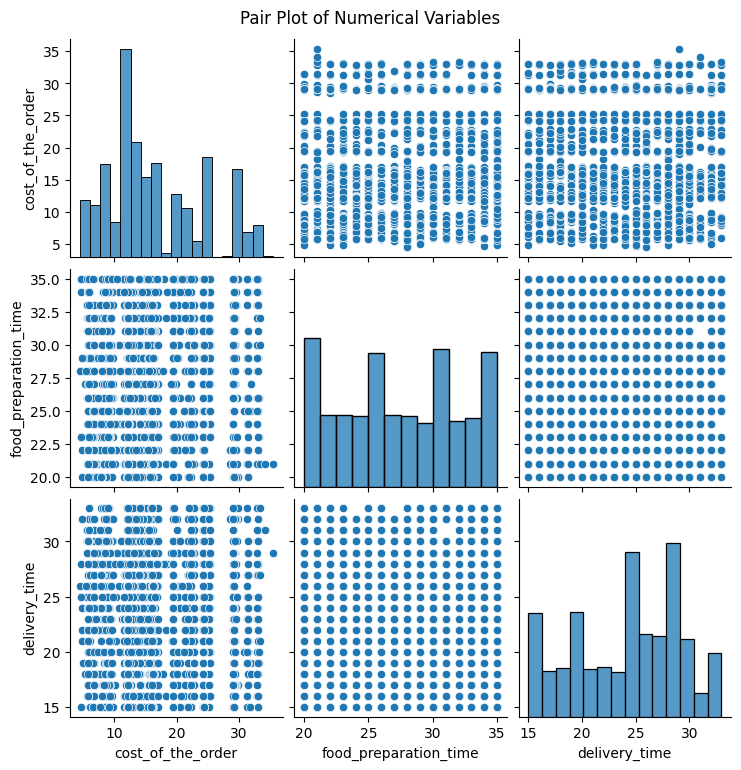

In [465]:
# 3. Generate a pair plot of the numerical variables
sns.pairplot(df[numerical_vars])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02) # Adjust suptitle position
plt.show()

### Analyze Numerical-Categorical Relationships (Cost of Order)

Create box plots to visualize the distribution of `cost_of_the_order` across different categories of `cuisine_type`, `day_of_the_week`, and `rating`.


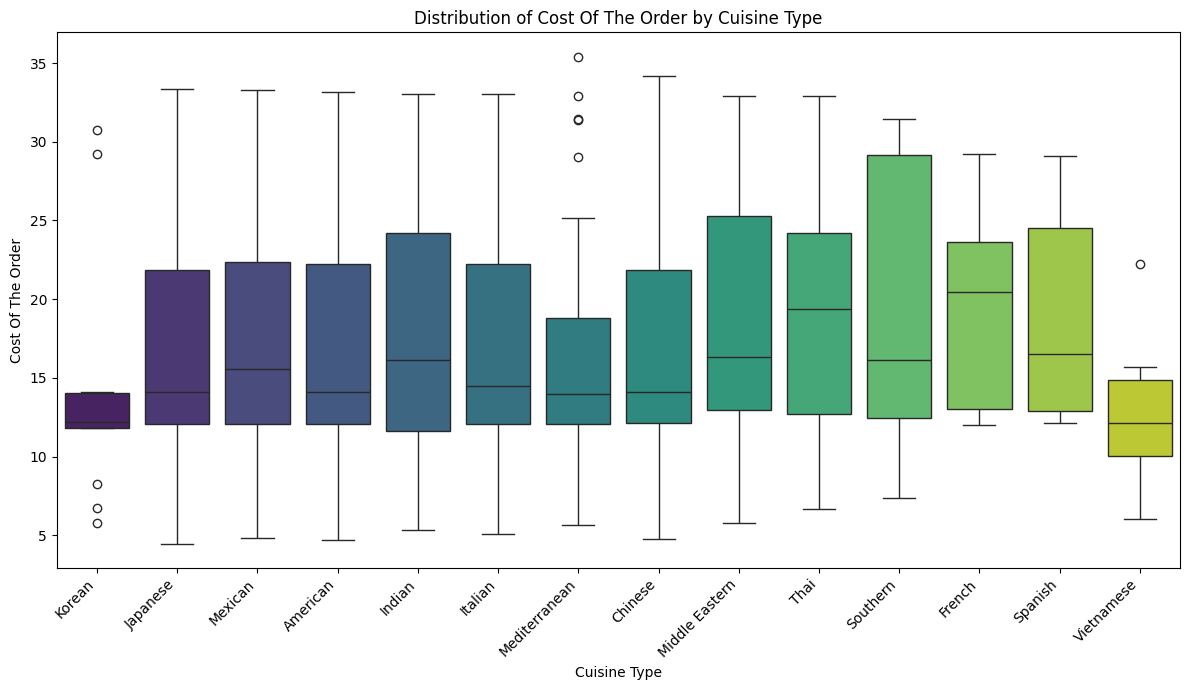

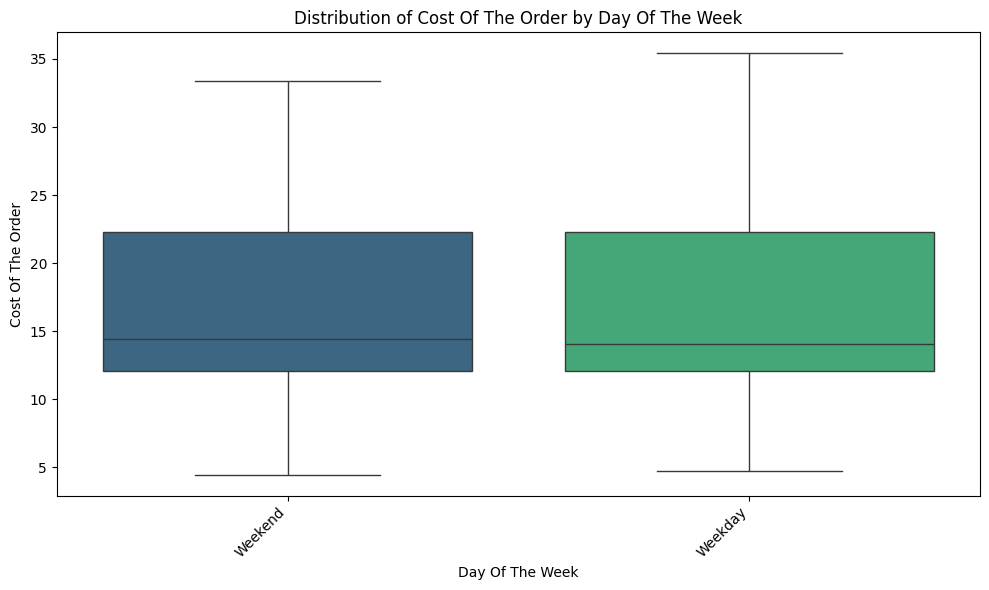

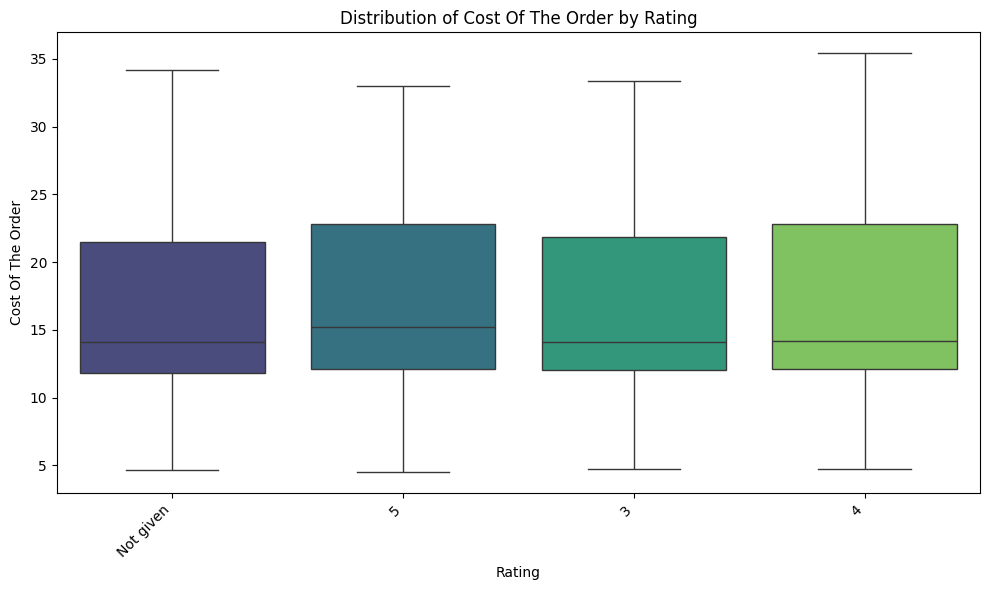

In [466]:

# Set the numerical variable to be analyzed
analysis_var = 'cost_of_the_order'

for col in categorical_vars:
    plt.figure(figsize=(12, 7) if col == 'cuisine_type' else (10, 6))
    sns.boxplot(data=df, x=col, y=analysis_var, palette='viridis')
    plt.title(f'Distribution of {analysis_var.replace("_", " ").title()} by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel(analysis_var.replace("_", " ").title())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Analyze Numerical-Categorical Relationships (Time Variables)
Generate box plots or violin plots to explore the relationship between `food_preparation_time` and `cuisine_type`, and `delivery_time` with `day_of_the_week` and `rating`.


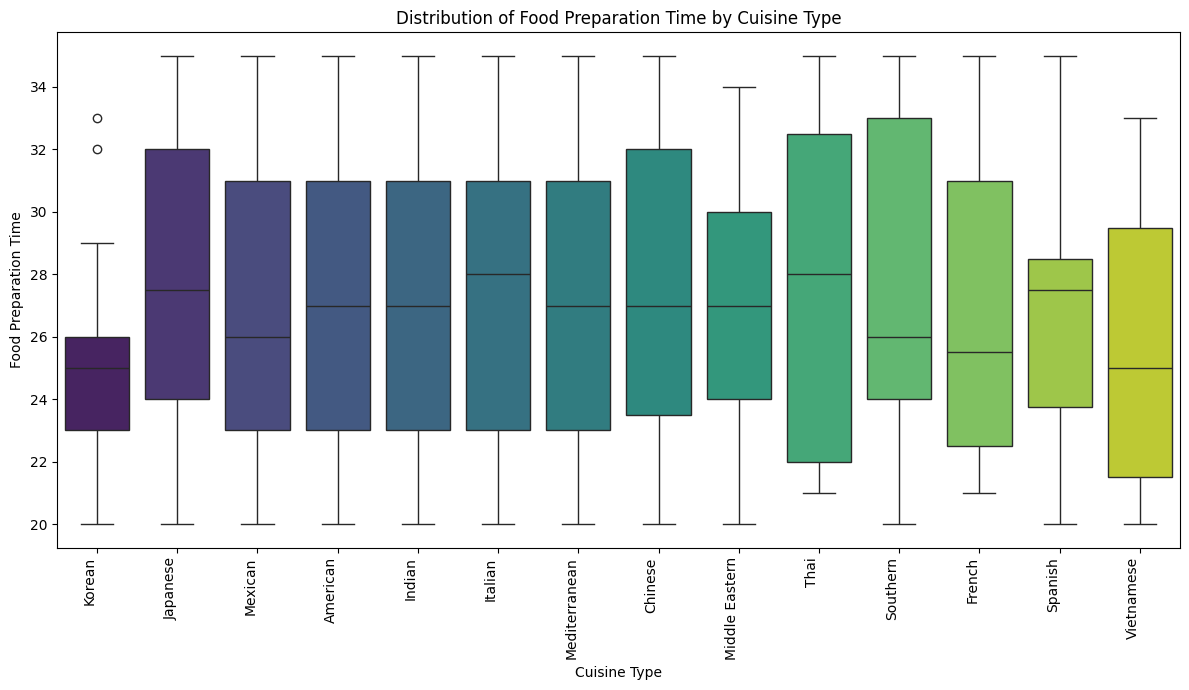

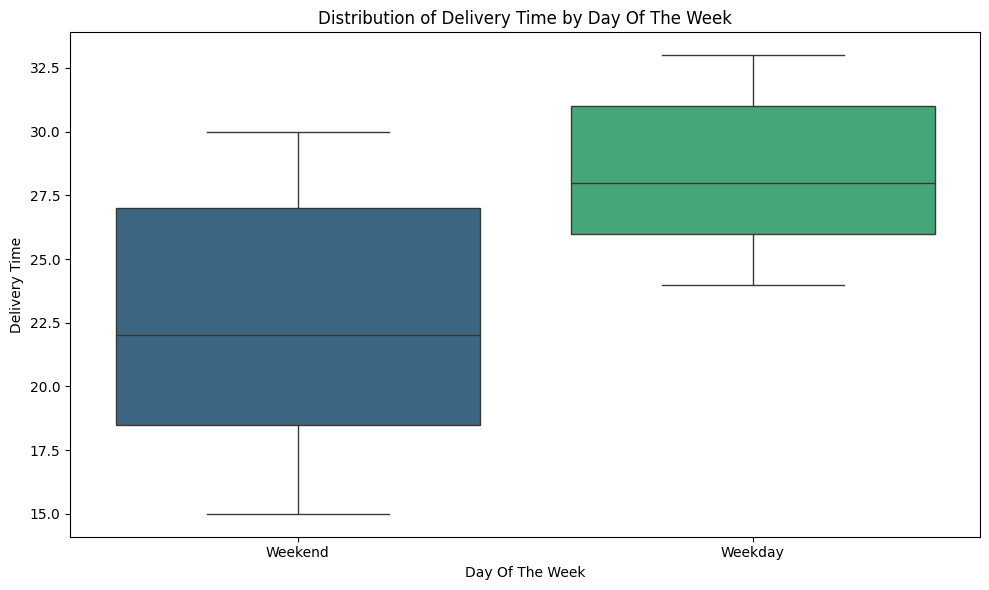

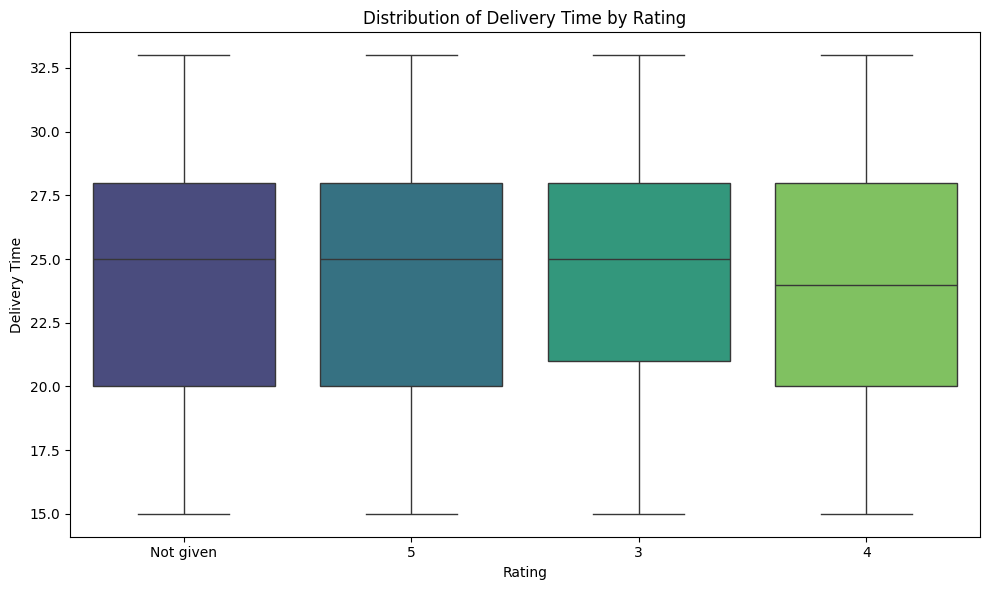

In [467]:

# Define the combinations of numerical and categorical variables for analysis
analysis_combinations = [
    ('food_preparation_time', 'cuisine_type'),
    ('delivery_time', 'day_of_the_week'),
    ('delivery_time', 'rating')
]

for num_var, cat_var in analysis_combinations:
    plt.figure(figsize=(12, 7) if cat_var == 'cuisine_type' else (10, 6))

    sns.boxplot(data=df, x=cat_var, y=num_var, palette='viridis', hue=cat_var, legend=False)

    plt.title(f'Distribution of {num_var.replace("_", " ").title()} by {cat_var.replace("_", " ").title()}')
    plt.xlabel(cat_var.replace("_", " ").title())
    plt.ylabel(num_var.replace("_", " ").title())

    if cat_var in ['cuisine_type', 'restaurant_name']:
        plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability if categories are many

    plt.tight_layout()
    plt.show()

### Observation 


*   **Weak Numerical Variable Relationships**: The analysis of numerical variables (`cost_of_the_order`, `food_preparation_time`, `delivery_time`) revealed extremely weak linear correlations.
    * `cost_of_the_order` had a very weak positive correlation with `food_preparation_time` (0.0415) and a very weak negative correlation with `delivery_time` (-0.0299).
    * `food_preparation_time` showed a very weak positive correlation with `delivery_time` (0.0111).
    * Pair plots further corroborated the absence of strong linear or obvious non-linear relationships among these numerical variables.
*   **Categorical Influence Exploration**: Box plots were successfully generated to visualize the distribution of `cost_of_the_order` across `cuisine_type`, `day_of_the_week`, and `rating`. Similarly, distributions of `food_preparation_time` by `cuisine_type`, and `delivery_time` by `day_of_the_week` and `rating` were visualized, providing a basis for exploring potential differences or patterns based on these categorical factors.


* The extremely weak correlations between the core numerical variables suggest that they are largely independent, implying that changes in one variable (e.g., food preparation time) do not linearly predict changes in another (e.g., order cost or delivery time). This could mean other factors or more complex relationships are at play.
* The generated box plots for numerical-categorical relationships provide a visual foundation. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [468]:
#1. Define a function to identify the Not given values and return the new rating number for furthur processing. so the data values for rating with 'Not given' = 0
df['rating'] = (df['rating'].replace('Not given', int(0))).astype(int)

#Visualize the the data after updating the rating
# df.info()

#2. Ommit the record marked as 0 i.e. where rating is 'Not given'
rated_restaurant = df[df['rating'] > 0 ]

#3. Group by restaurant and calculate count and mean
promo_stats = rated_restaurant.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

#4. Filter for count > 50 and rating  > 4
eligible_for_promo = promo_stats[
    (promo_stats['count'] > 50) & 
    (promo_stats['mean'] > 4)
]

# 3. Display the results
print("Restaurants qualifying for the promotional offer:")
print(eligible_for_promo)

Restaurants qualifying for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
Restaurants qualifying for the promotional offer :
These restaurants all have a rating count greater than 50 and an average rating greater than 4.
- Blue Ribbon Fried Chicken (Rating Count: 64, Average Rating: 4.33)
- Blue Ribbon Sushi (Rating Count: 73, Average Rating: 4.22)
- Shake Shack (Rating Count: 133, Average Rating: 4.28)
- The Meatball Shop (Rating Count: 84, Average Rating: 4.51)


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [469]:
# Write the code here
# Define a function to calculate commission based on order cost
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25  # 25% commission for orders > $20
    elif cost > 5:
        return cost * 0.15  # 15% commission for orders > $5 (and <= $20)
    else:
        return 0.0           # 0% commission for orders <= $5

# Apply the function to the 'cost_of_the_order' column to get commission for each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate the total net revenue
total_net_revenue = df['commission'].sum()

print(f"The total net revenue generated by the company is: ${total_net_revenue:.2f}")

The total net revenue generated by the company is: $6166.30


#### Observations:
The total net revenue generated by the company is: $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [470]:
# Calculate the total time for each order (food preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Filter orders where total_delivery_time is greater than 60 minutes
orders_gt_60_min = df[df['total_delivery_time'] > 60]

# Count the number of such orders
count_gt_60_min = len(orders_gt_60_min)

# Get the total number of orders
total_orders = len(df)

# Calculate the percentage
percentage_gt_60_min = (count_gt_60_min / total_orders) * 100

print(f"The percentage of orders that take more than 60 minutes to be delivered is: {percentage_gt_60_min:.2f}%")

The percentage of orders that take more than 60 minutes to be delivered is: 10.54%


#### Observations:
The percentage of orders that take more than 60 minutes to be delivered is: 10.54%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [471]:
# Filter orders for weekdays and weekends
weekday_orders = df[df['day_of_the_week'] == 'Weekday']
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Calculate mean delivery time for weekdays
mean_delivery_time_weekday = weekday_orders['delivery_time'].mean()

# Calculate mean delivery time for weekends
mean_delivery_time_weekend = weekend_orders['delivery_time'].mean()

print(f"Mean delivery time on Weekdays: {mean_delivery_time_weekday:.2f} minutes")
print(f"Mean delivery time on Weekends: {mean_delivery_time_weekend:.2f} minutes")

#To get the amount of average delivery time longer on weekends,weekdays
if mean_delivery_time_weekday > mean_delivery_time_weekend:
    print(f"On average, delivery time is longer on weekdays by {(mean_delivery_time_weekday - mean_delivery_time_weekend):.2f} minutes.")
elif mean_delivery_time_weekend > mean_delivery_time_weekday:
    print(f"On average, delivery time is longer on weekends by {(mean_delivery_time_weekend - mean_delivery_time_weekday):.2f} minutes.")
else:
    print("Mean delivery times are the same for weekdays and weekends.")

Mean delivery time on Weekdays: 28.34 minutes
Mean delivery time on Weekends: 22.47 minutes
On average, delivery time is longer on weekdays by 5.87 minutes.


#### Observations:
The analysis shows that the mean delivery time on weekdays is 28.34 minutes, while on weekend it is 22.47 minutes. On an average, delivery time is longer on weekdays by 5.87 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*   **Order Costs & Times:** Most orders range from $10-$25 with a median of $15, showing a right-skewed distribution. Food preparation times are consistent (20-35 mins), while delivery times (20-30 mins) are notably longer on weekdays compared to weekends, with some instances of extended delivery durations.
*   **Dominant Preferences:** American, Japanese, and Italian cuisines are overwhelmingly popular. A small number of restaurants receive a disproportionately high volume of orders, indicating customer loyalty or strong market presence.
*   **Peak Demand Periods:** Weekends experience significantly higher order volumes, highlighting these days as critical periods for the business.
*   **Customer Feedback Landscape:** The majority of orders come from restaurants with 4 or 5-star ratings. However, a substantial portion of orders have 'Not given' ratings, indicating a missed opportunity for valuable customer feedback.
*   **Numerical Variable Independence:** The numerical variables (cost, food preparation time, delivery time) exhibit very weak linear correlations, suggesting they operate largely independently or are influenced by other, more complex factors.

### Recommendations:
*   **Optimize for Popular Cuisines & Weekend Peak:** Strategically focus marketing efforts and operational resources on American, Japanese, and Italian cuisines, especially during weekends. Ensure adequate staffing for delivery and restaurant capacity to meet high demand and maintain service quality during these peak times.
*   **Enhance Rating Collection System:** Implement more proactive and user-friendly in-app prompts, reminders, and small incentives (e.g., loyalty points, minor discounts) to encourage customers to provide ratings, thereby reducing the 'Not given' category and gathering more actionable feedback.
*   **Highlight Top-Rated Restaurants:** Actively promote and feature restaurants with 4 and 5-star ratings through dedicated sections or badges in the app, leveraging social proof to build customer trust and drive more orders to these establishments.
*   **Address Weekday Delivery Time Discrepancy:** Investigate the reasons behind longer average delivery times on weekdays. Implement operational adjustments, such as optimized routing or targeted promotions to balance driver availability, to reduce weekday delivery times and improve overall customer satisfaction.


---